In [3]:
x=5
sig=1/(1+(2.71** -x))

In [4]:
sig

0.9932049536637874

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
df=pd.read_csv('/content/advertising (2).csv')

In [8]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.shape

(1000, 10)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [14]:
dfDupData = df[df.duplicated()]

In [15]:
dfDupData

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(1000, 10)

In [19]:
import plotly.express as px

In [20]:
colList = df.columns

In [21]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title = f'Box plot of {x} Column')
    fig.show()

In [22]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [23]:
outCols = ['Daily Time Spent on Site', 'Area Income','Daily Internet Usage', 'Clicked on Ad']

In [24]:
outCols

['Daily Time Spent on Site',
 'Area Income',
 'Daily Internet Usage',
 'Clicked on Ad']

In [25]:
for x in outCols:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3-Q1

  LF = Q1 - (1.5*IQR)
  UF = Q3 + (1.5*IQR)
  # keep the values in between UF and LF
  df = df[(df[x]>= LF) & (df[x]<= UF)]

In [26]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

print("Categorical columns to be encoded:", categorical_cols)

Categorical columns to be encoded: ['Ad Topic Line', 'City', 'Country', 'Timestamp']


In [27]:
categorical_cols = ['Daily Time Spent on Site', 'Area Income','Daily Internet Usage', 'Clicked on Ad']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [28]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

print("Categorical columns to be encoded:", categorical_cols)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns to be encoded: ['Ad Topic Line', 'City', 'Country', 'Timestamp']


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Columns: 6014 entries, Age to Timestamp_2016-07-24 00:22:16
dtypes: bool(6012), int64(2)
memory usage: 5.7 MB


In [30]:

colList_numerical_after_encoding = ['Age', 'Male']

for x in colList_numerical_after_encoding:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title = f'Box plot of {x} Column')
    fig.show()

In [31]:
df.shape

(991, 6014)

In [32]:
catCol = []
for x in df.columns:
  if df[x].dtype == 'object':
    catCol.append(x)


In [33]:
catCol

[]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Columns: 6014 entries, Age to Timestamp_2016-07-24 00:22:16
dtypes: bool(6012), int64(2)
memory usage: 5.7 MB


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lableMap = {}
for x in catCol:
  df[x] = le.fit_transform(df[x])
  lableMap[x] = dict(zip(le.classes_, le.transform(le.classes_)))
  print(f'Mapped for {x}: {lableMap[x]}')

In [36]:
df.head()

,Age,Male,Daily Time Spent on Site_32.84,Daily Time Spent on Site_32.91,Daily Time Spent on Site_32.99,Daily Time Spent on Site_33.21,Daily Time Spent on Site_33.33,Daily Time Spent on Site_33.52,Daily Time Spent on Site_34.04,Daily Time Spent on Site_34.3,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,35,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,31,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,35,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
x = df.drop(columns=['Clicked on Ad_1'])

In [38]:
x

,Age,Male,Daily Time Spent on Site_32.84,Daily Time Spent on Site_32.91,Daily Time Spent on Site_32.99,Daily Time Spent on Site_33.21,Daily Time Spent on Site_33.33,Daily Time Spent on Site_33.52,Daily Time Spent on Site_34.04,Daily Time Spent on Site_34.3,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,35,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,31,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,35,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,45,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,51,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,19,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
y = df['Clicked on Ad_1']

In [40]:
y = df['Clicked on Ad_1']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=42)

In [42]:
x_train

,Age,Male,Daily Time Spent on Site_32.84,Daily Time Spent on Site_32.91,Daily Time Spent on Site_32.99,Daily Time Spent on Site_33.21,Daily Time Spent on Site_33.33,Daily Time Spent on Site_33.52,Daily Time Spent on Site_34.04,Daily Time Spent on Site_34.3,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
216,53,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
295,36,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49,46,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
726,24,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
236,36,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,25,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271,37,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
868,25,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437,27,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
x_test

,Age,Male,Daily Time Spent on Site_32.84,Daily Time Spent on Site_32.91,Daily Time Spent on Site_32.99,Daily Time Spent on Site_33.21,Daily Time Spent on Site_33.33,Daily Time Spent on Site_33.52,Daily Time Spent on Site_34.04,Daily Time Spent on Site_34.3,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
214,40,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
332,49,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
503,37,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
310,34,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,34,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,31,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306,33,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
816,48,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
238,33,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
model = LogisticRegression(max_iter=1000)

In [45]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False,

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.7185929648241206

In [50]:
confusion_matrix(y_test,y_pred)

array([[76, 27],
       [29, 67]])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.72      0.74      0.73       103
        True       0.71      0.70      0.71        96

    accuracy                           0.72       199
   macro avg       0.72      0.72      0.72       199
weighted avg       0.72      0.72      0.72       199



In [52]:
def sigmoid(x):
  result = 1/(1+np.exp(-x))
  return result

In [53]:
y_score = model.predict_proba(x_test)[:,1]

In [54]:
y_score

array([0.62046754, 0.9031736 , 0.55520975, 0.34896263, 0.55070598,
       0.50520389, 0.15681763, 0.81831662, 0.78842963, 0.98468796,
       0.31875309, 0.77244976, 0.2921102 , 0.5961173 , 0.38865401,
       0.61996162, 0.27367495, 0.94328144, 0.45149598, 0.17853716,
       0.17831048, 0.69193091, 0.41075238, 0.19102397, 0.38013059,
       0.80112927, 0.1685624 , 0.32835652, 0.12822309, 0.30113275,
       0.24400951, 0.23086346, 0.14735054, 0.84049465, 0.38511917,
       0.5675387 , 0.14704824, 0.22979721, 0.16263227, 0.11972913,
       0.58168992, 0.48463405, 0.47612987, 0.23662603, 0.88919462,
       0.51145138, 0.73667902, 0.29051108, 0.26676354, 0.83852989,
       0.24829878, 0.59713751, 0.35356339, 0.24782211, 0.13099651,
       0.59993819, 0.7066384 , 0.63870266, 0.19393023, 0.64889442,
       0.71400637, 0.16739505, 0.98260532, 0.49072153, 0.76518882,
       0.77679962, 0.76162577, 0.35356339, 0.1473371 , 0.68409426,
       0.31128926, 0.35834177, 0.74456592, 0.72966268, 0.73756

In [55]:
sorInd = np.argmax(y_score)

In [56]:
sorInd

np.int64(146)

In [57]:
sortLable = y_test.iloc[sorInd]

In [58]:
sortLable

np.True_

In [59]:
sortScore = y_score[sorInd]

In [60]:
sortScore

np.float64(0.9906304989910564)

In [61]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_value = 5
y_sigmoid = sigmoid(x_value)

In [62]:
x_value = np.linspace(-10,10,100)
y_sigmoid = sigmoid(x_value)

In [63]:
y_sigmoid

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

[]

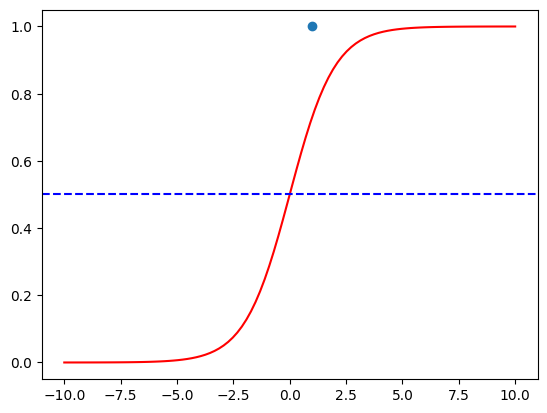

In [64]:
plt.plot(x_value, y_sigmoid,color = 'red')
plt.axhline(y=0.5, color = 'Blue', linestyle = '--')
plt.scatter(sortScore,sortLable)
plt.plot()

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7931330906148868


In [66]:
null_count=df.isnull().sum()
if null_count.sum() > 0:
    plt.figure(figsize=(10, 6))
    null_count.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Count of Null Values per Column', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Missing Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No null values found in the dataset to plot.")

No null values found in the dataset to plot.


In [67]:
df.isnull()

,Age,Male,Daily Time Spent on Site_32.84,Daily Time Spent on Site_32.91,Daily Time Spent on Site_32.99,Daily Time Spent on Site_33.21,Daily Time Spent on Site_33.33,Daily Time Spent on Site_33.52,Daily Time Spent on Site_34.04,Daily Time Spent on Site_34.3,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isnull().sum()

,0
Age,0
Male,0
Daily Time Spent on Site_32.84,0
Daily Time Spent on Site_32.91,0
Daily Time Spent on Site_32.99,0
...,...
Timestamp_2016-07-23 05:21:39,0
Timestamp_2016-07-23 06:18:51,0
Timestamp_2016-07-23 11:46:28,0
Timestamp_2016-07-23 14:47:23,0


In [69]:
print("Descriptive Statistics:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

Descriptive Statistics:
|       | Age     | Male     |
|:------|:--------|:---------|
| count | 991     | 991      |
| mean  | 35.9859 | 0.479314 |
| std   | 8.80472 | 0.499824 |
| min   | 19      | 0        |
| 25%   | 29      | 0        |
| 50%   | 35      | 0        |
| 75%   | 42      | 1        |
| max   | 61      | 1        |


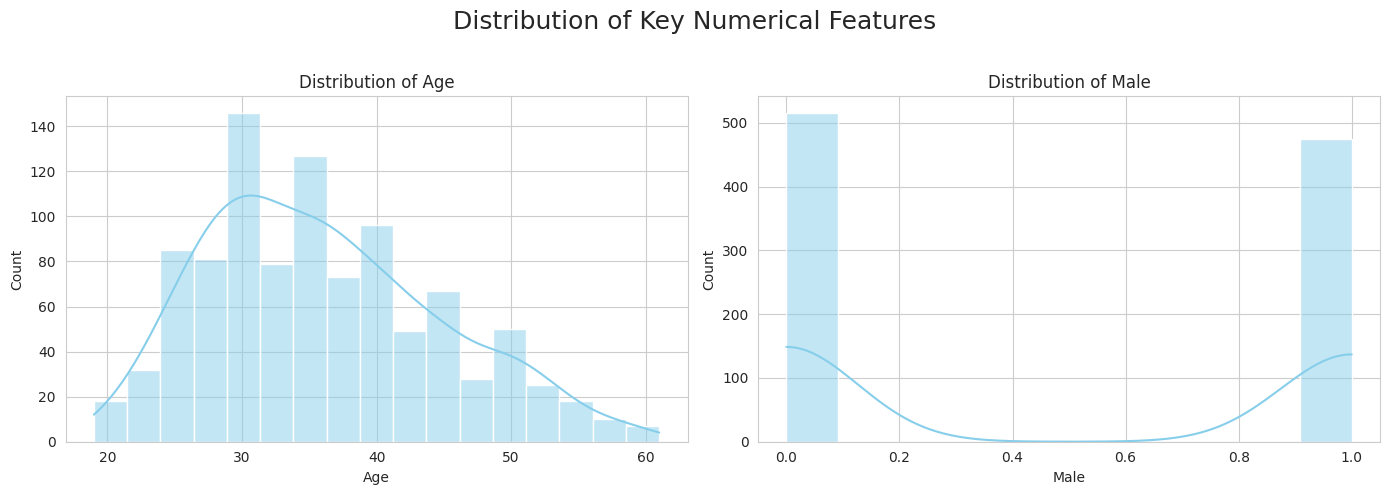

In [70]:
sns.set_style('whitegrid')
numerical_cols = ['Age', 'Male']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Key Numerical Features', fontsize=18)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_ = i % 2
    sns.histplot(df[col], kde=True, ax=axes[col_], color='skyblue')
    axes[col_].set_title(f'Distribution of {col}', fontsize=12)
    axes[col_].set_xlabel(col)
    axes[col_].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

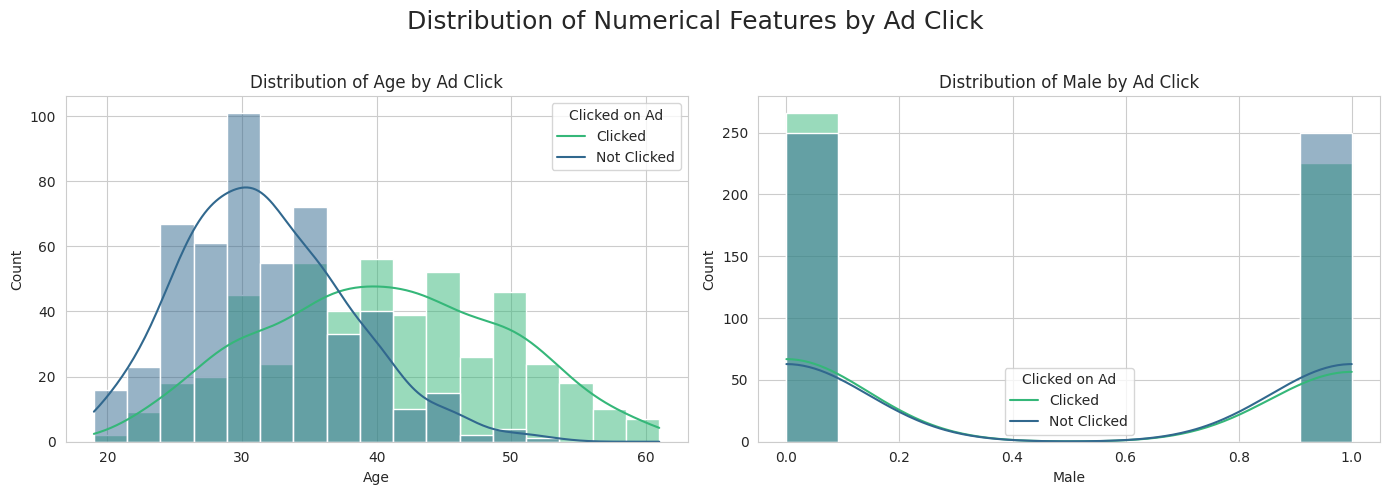

In [71]:
sns.set_style('whitegrid')
numerical_cols = ['Age', 'Male']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Numerical Features by Ad Click', fontsize=18)

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Clicked on Ad_1', kde=True, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Ad Click', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Clicked on Ad', labels=['Clicked', 'Not Clicked'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

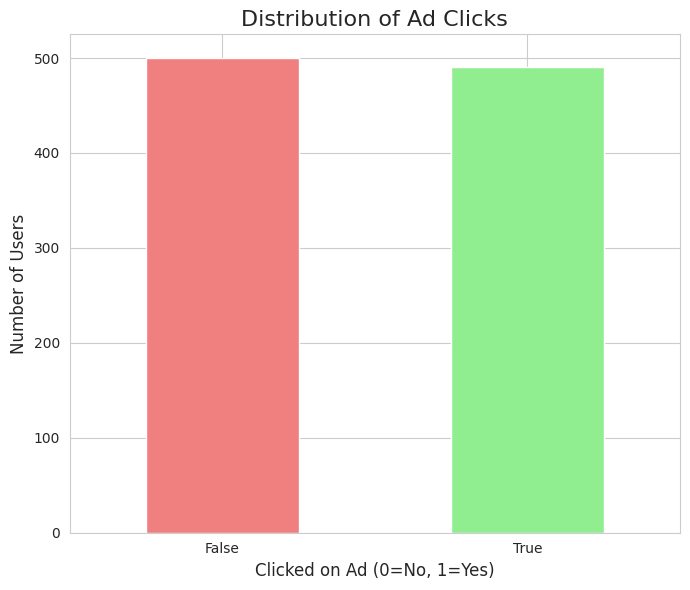

In [72]:
click_counts = df['Clicked on Ad_1'].value_counts()

plt.figure(figsize=(7, 6))
click_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Distribution of Ad Clicks', fontsize=16)
plt.xlabel('Clicked on Ad (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-997660656.py:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



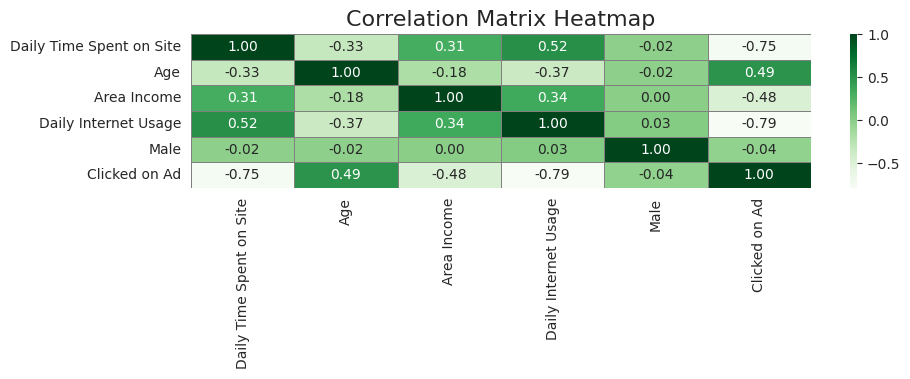

In [79]:

corrMat = df.corr(numeric_only=True)
if corrMat.shape[0] > 50:
    corrMat = corrMat.iloc[:50, :50]
plt.figure(figsize=(10, 2))
sns.heatmap(corrMat, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


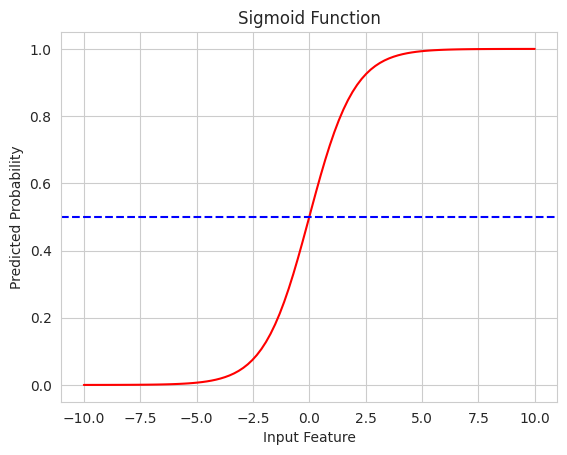

In [80]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid, color='red')
plt.axhline(0.5, linestyle='--', color='blue')
plt.title("Sigmoid Function")
plt.xlabel("Input Feature")
plt.ylabel("Predicted Probability")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



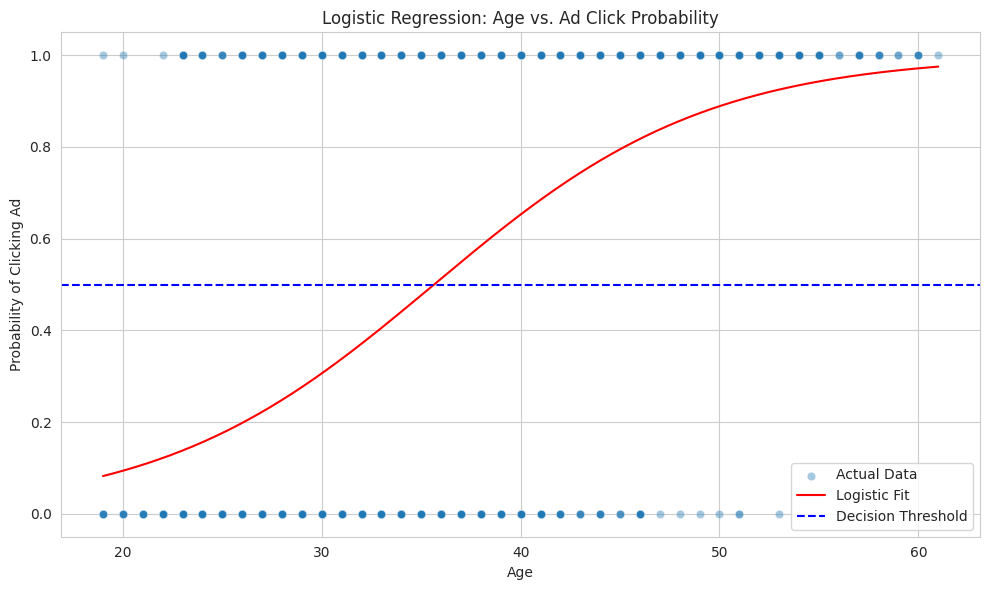

In [81]:
X = df[['Age']]
y = df['Clicked on Ad']

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Generate prediction curve
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Clicked on Ad', data=df, alpha=0.4, label='Actual Data')
plt.plot(x_range, y_prob, color='red', label='Logistic Fit')
plt.axhline(0.5, linestyle='--', color='blue', label='Decision Threshold')
plt.xlabel("Age")
plt.ylabel("Probability of Clicking Ad")
plt.title("Logistic Regression: Age vs. Ad Click Probability")
plt.legend()
plt.tight_layout()
plt.show()


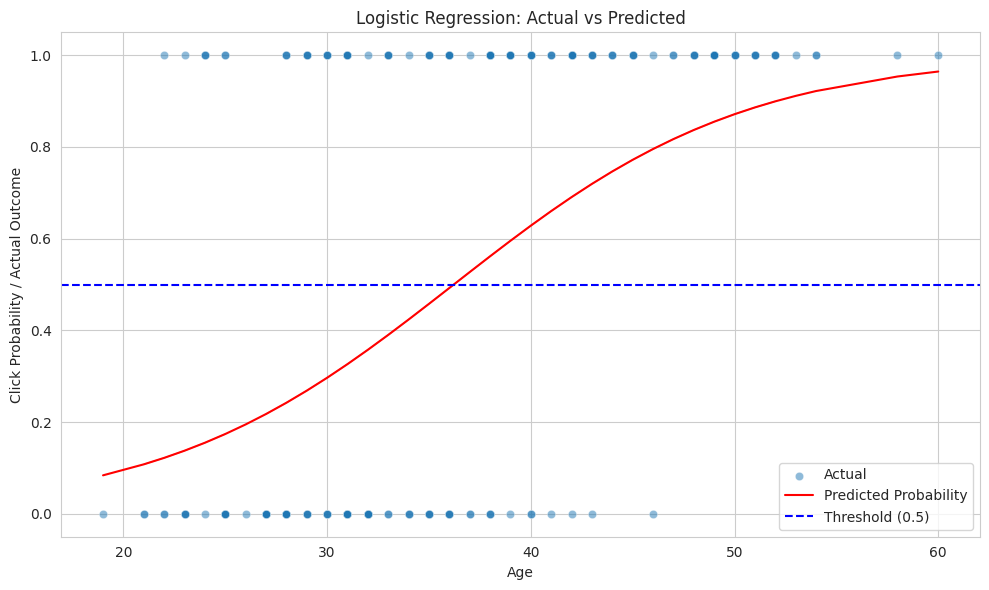

In [89]:
# Example: Predicting 'Clicked on Ad' using 'Age'
X = df[['Age']]
y = df['Clicked on Ad']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Age': x_test['Age'],
    'Actual': y_test,
    'Predicted_Prob': y_pred_prob
})

# Sort by Age for smooth curve
plot_df = plot_df.sort_values(by='Age')

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Actual', data=plot_df, label='Actual', alpha=0.5)
sns.lineplot(x='Age', y='Predicted_Prob', data=plot_df, color='red', label='Predicted Probability')
plt.axhline(0.5, linestyle='--', color='blue', label='Threshold (0.5)')
plt.xlabel("Age")
plt.ylabel("Click Probability / Actual Outcome")
plt.title("Logistic Regression: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
print(df.columns.tolist())

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']


In [91]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75        89
           1       0.86      0.66      0.74       111

    accuracy                           0.75       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.75      0.75       200

